In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import plotly.plotly as py
#import plotly.graph_objs as go
#from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X=iris.iloc[:,:4].values
y=iris['species'].values
print(y)
print(X)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

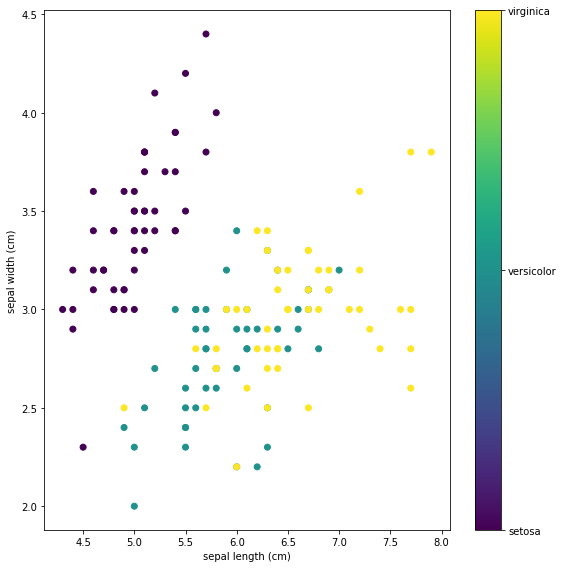

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 8))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [7]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=28)

In [8]:
### NORMALIZTION / FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
### WE WILL FIT THE THE CLASSIFIER TO THE TRAINING SET
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
y_pred = naiveClassifier.predict(X_test)
#Keeping the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#Actual->LEFT
#predicted->RIGHT
#Number of values to be print
y_compare[:20,:]

array([['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor']], dtype=object)

Text(0, 0.5, 'PREDICTED')

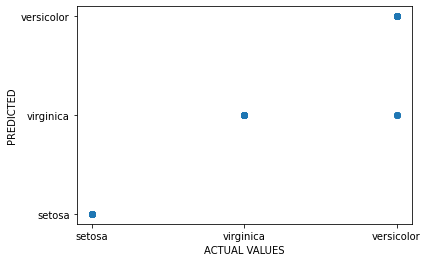

In [11]:
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED")

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 11  4]
 [ 0  0 12]]


In [13]:
#finding accuracy from the confusion matrix.
a = cm.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=cm[row,c]
        else:
            falsePrediction += cm[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(cm.sum()))

Correct predictions:  34
False predictions 4


Accuracy of the Naive Bayes Clasification is:  0.8947368421052632
